In [1]:
import time
import quantum_systems as qs
import matplotlib.pyplot as plt

In [2]:
import inspect
lines = inspect.getsource(qs.quantum_dots.one_dim.one_dim_qd._compute_inner_integral)
print(lines)

@numba.njit(cache=True)
def _compute_inner_integral(spf, l, num_grid_points, grid, alpha, a):
    inner_integral = np.zeros((l, l, num_grid_points), dtype=np.complex128)

    for i in range(num_grid_points):
        coulomb = _shielded_coulomb(grid[i], grid, alpha, a)
        for q in range(l):
            for s in range(l):
                inner_integral[q, s, i] = _trapz(
                    np.conjugate(spf[q]) * coulomb * spf[s],
                    grid,
                )

    return inner_integral



In [3]:
def system_timing(n, l_0):
    grid_length = 10        # compute from x = -10 to x = 10 in 1D
    num_grid_points = 2001
    omega = 0.25            # strength of harmonic oscillator potential
    
    odho = qs.ODQD(l_0, grid_length, num_grid_points, a = 0.25, alpha = 1)
    system = qs.GeneralOrbitalSystem(n = n, basis_set=odho)

In [10]:
n = 2                   # number of particles
times = []
ls = [10, 15, 20, 25, 30, 40, 50, 60]

for l in ls:
    start = time.time()
    system_timing(n, l)
    end = time.time()
    times.append(end-start)

In [14]:
times = [1.4262003898620605, 2.580925703048706, 5.000466346740723, 8.725608825683594, 14.168058633804321, 33.649773836135864, 69.72981882095337, 132.9937698841095]

In [5]:
old_times = [2.535578727722168, 3.9249420166015625, 7.124464511871338, 11.861149549484253, 18.750235557556152, 41.8593065738678, 83.07321524620056, 149.7788336277008]

In [1]:
import numpy as np
import matplotlib.pyplot as plt

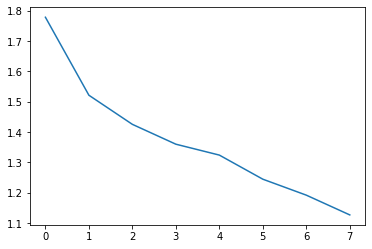

In [26]:
plt.plot(np.array(old_times) / np.array(times))

In [16]:
np.array(old_times) / np.array(times)

array([1.77785586, 1.52074971, 1.42476002, 1.35934922, 1.32341601,
       1.24396992, 1.19135854, 1.1262094 ])